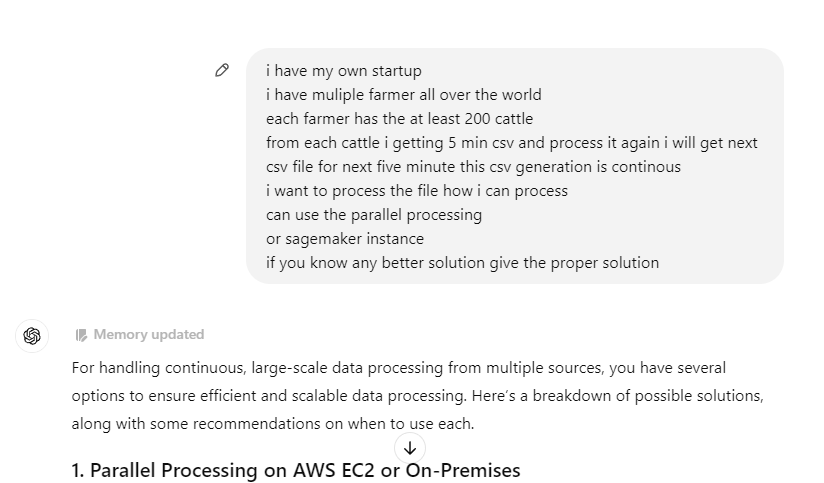

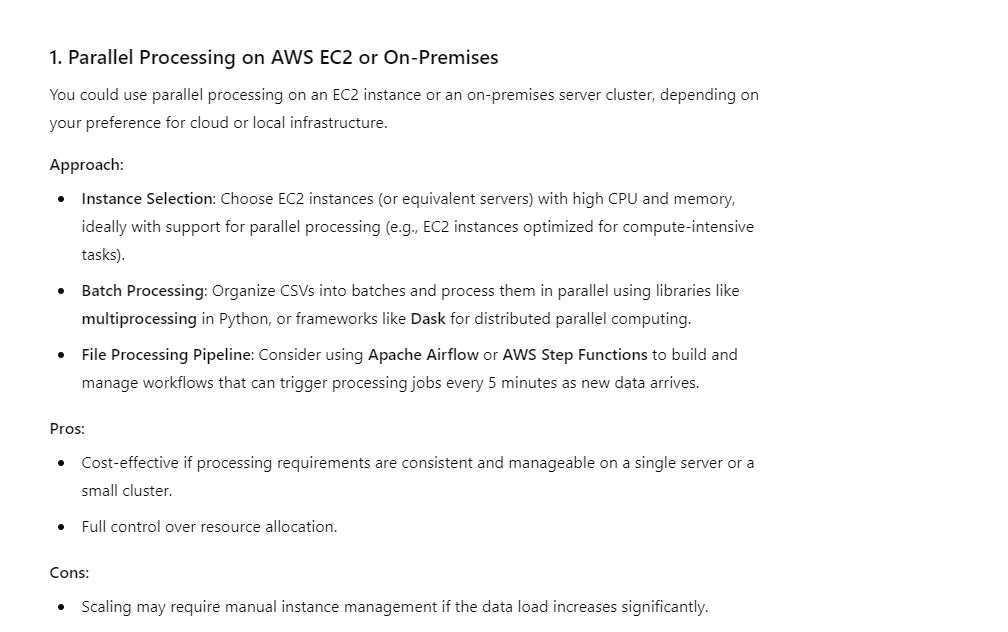

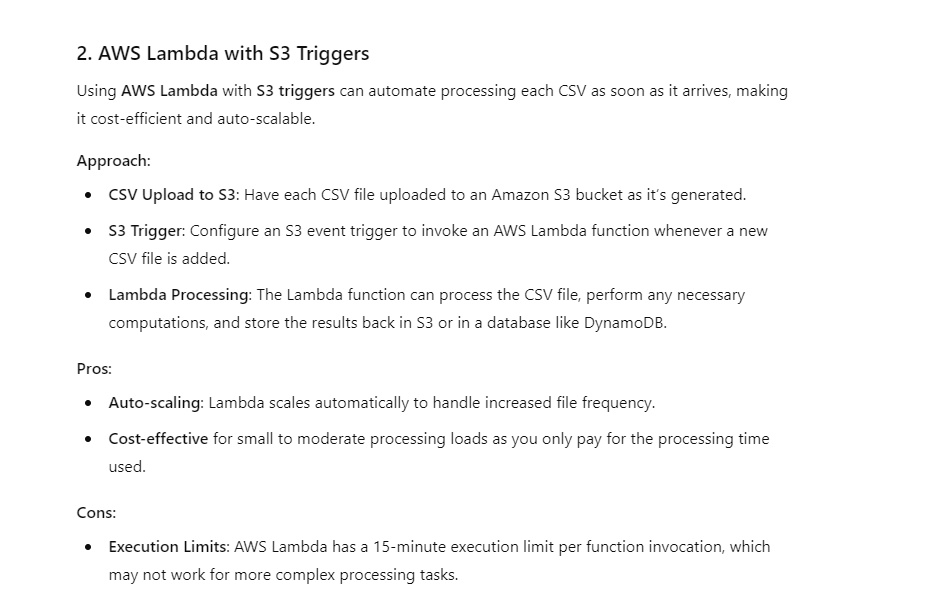

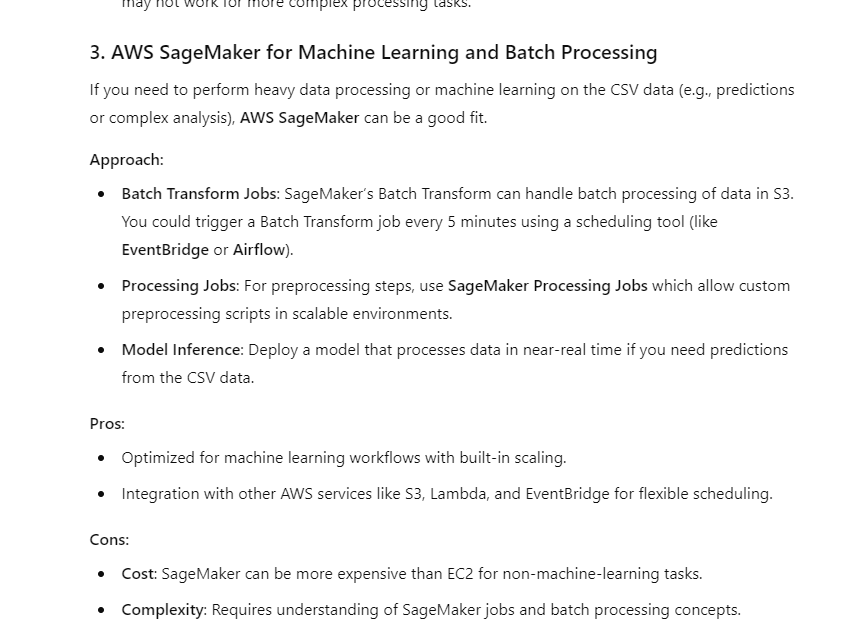

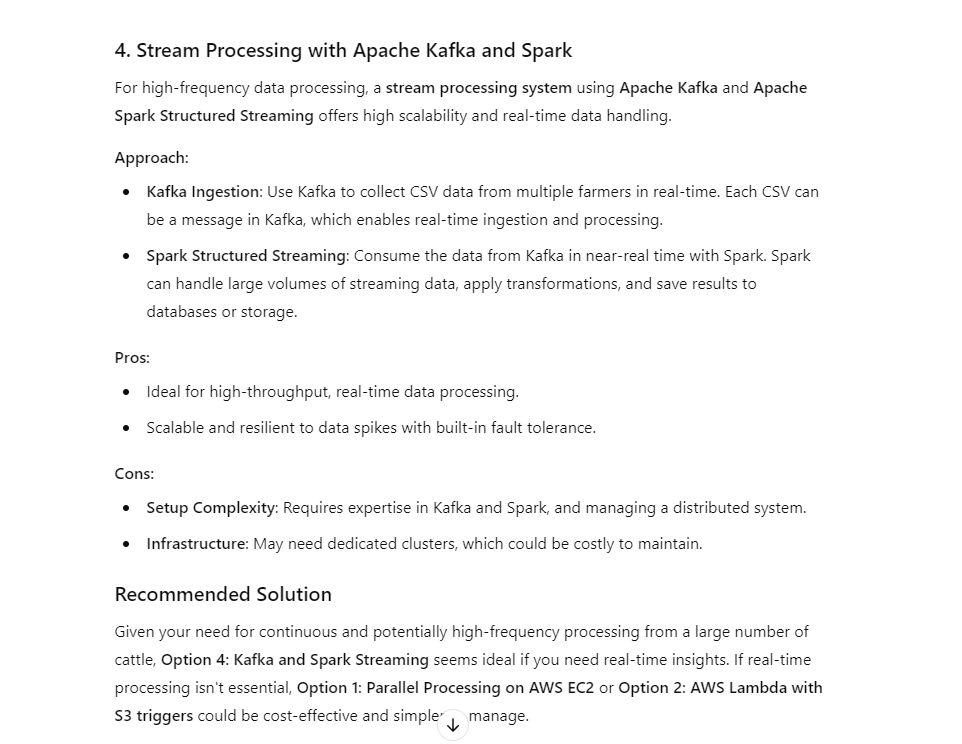

# SAGEMAKER PROCESS LARGE SCALED DATA

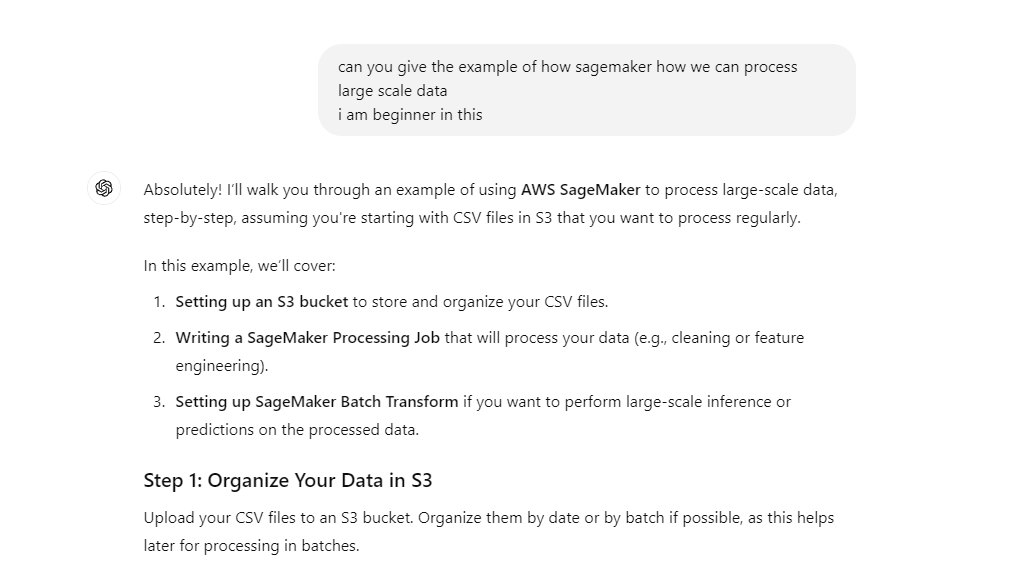
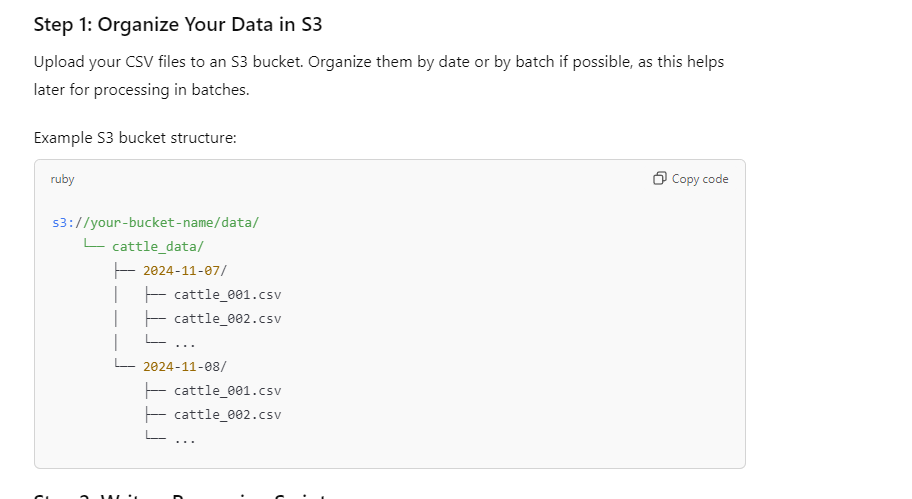
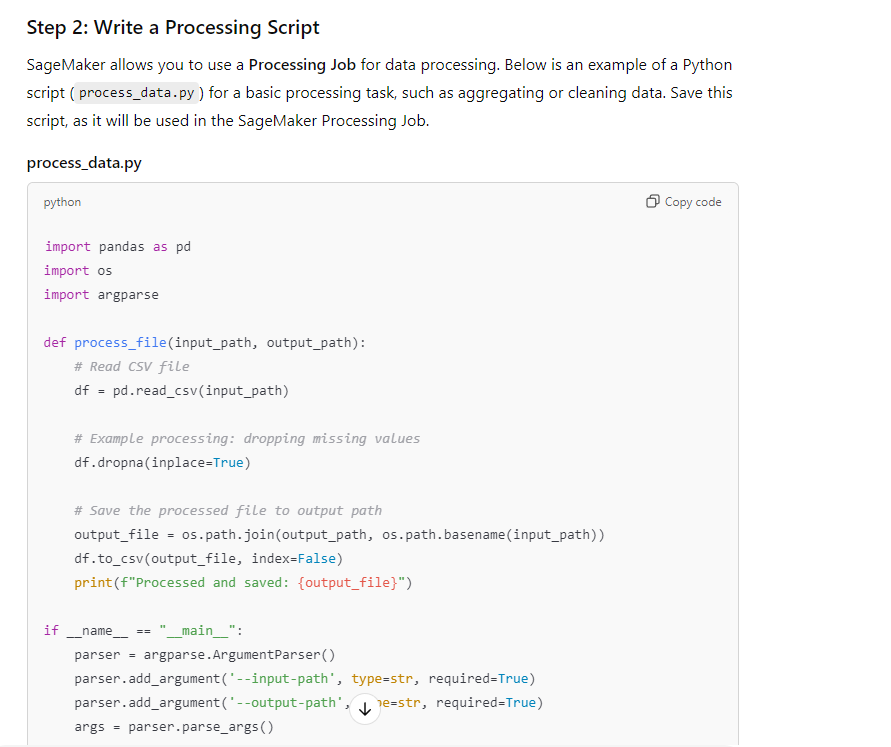
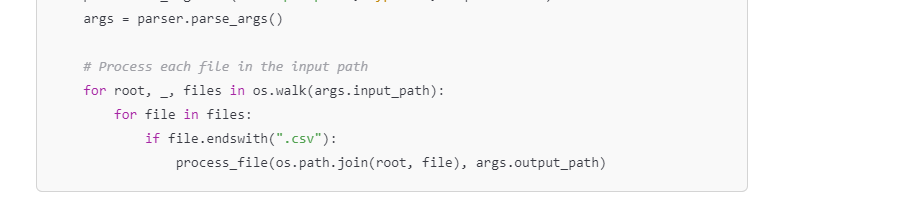

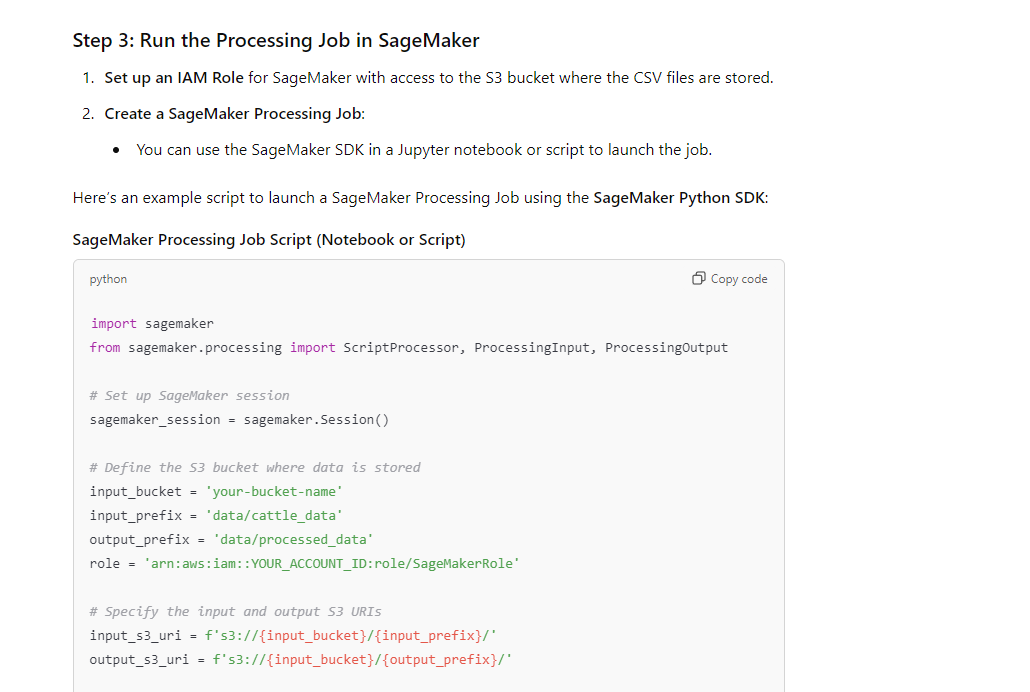

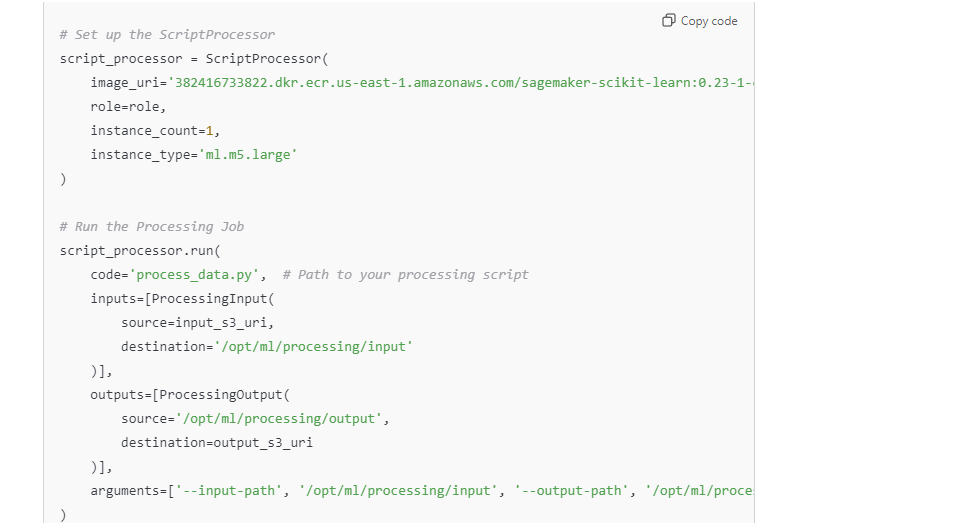

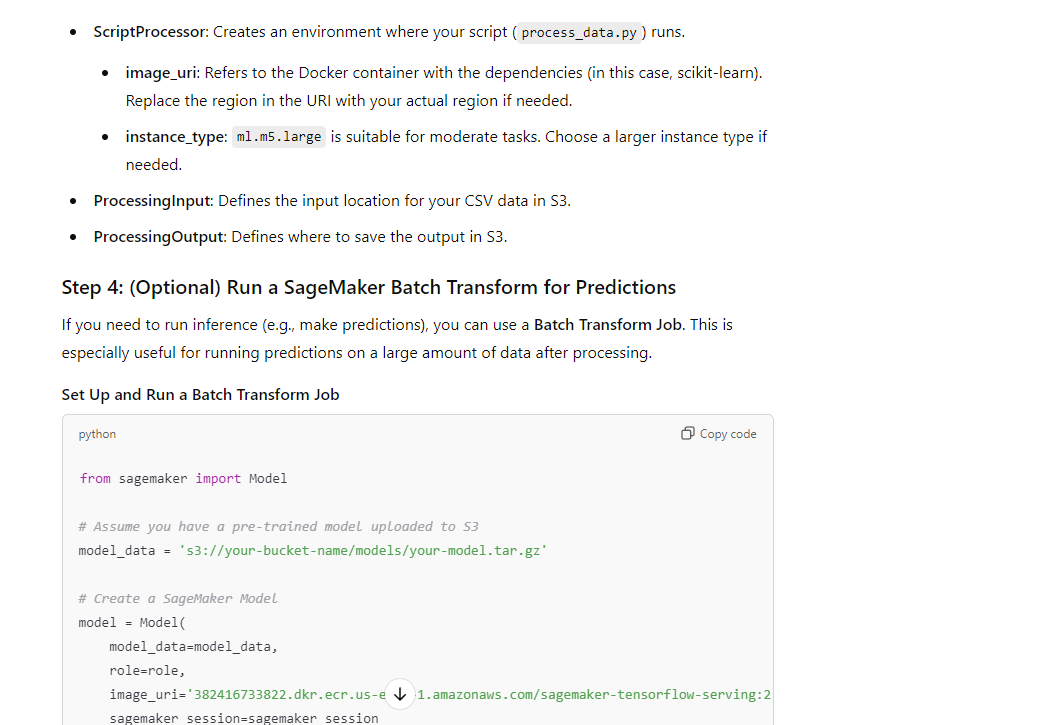
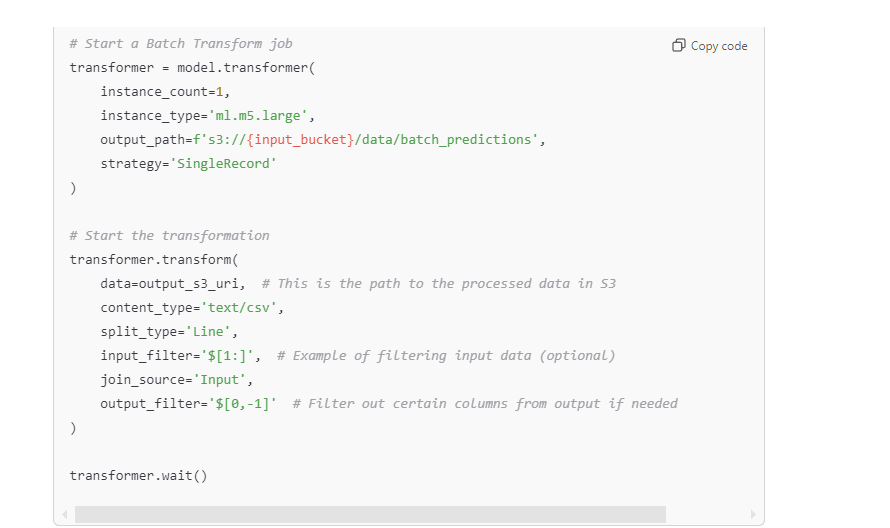

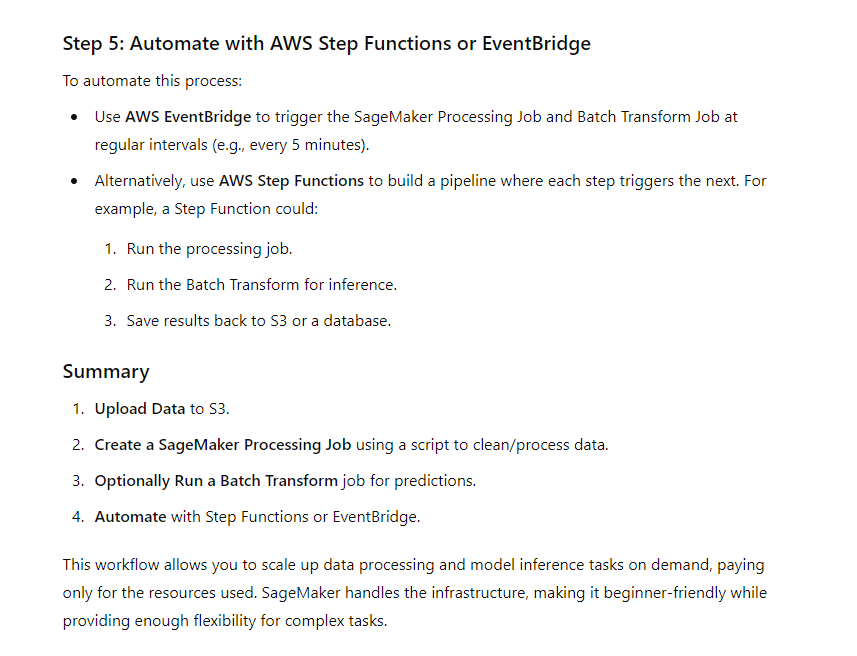

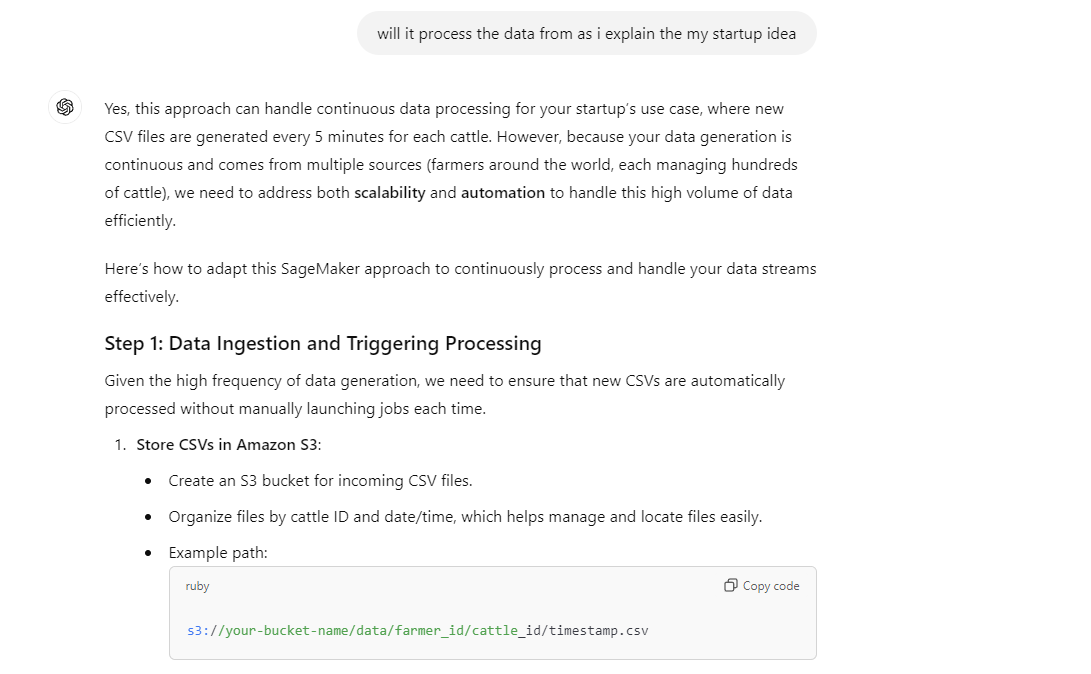

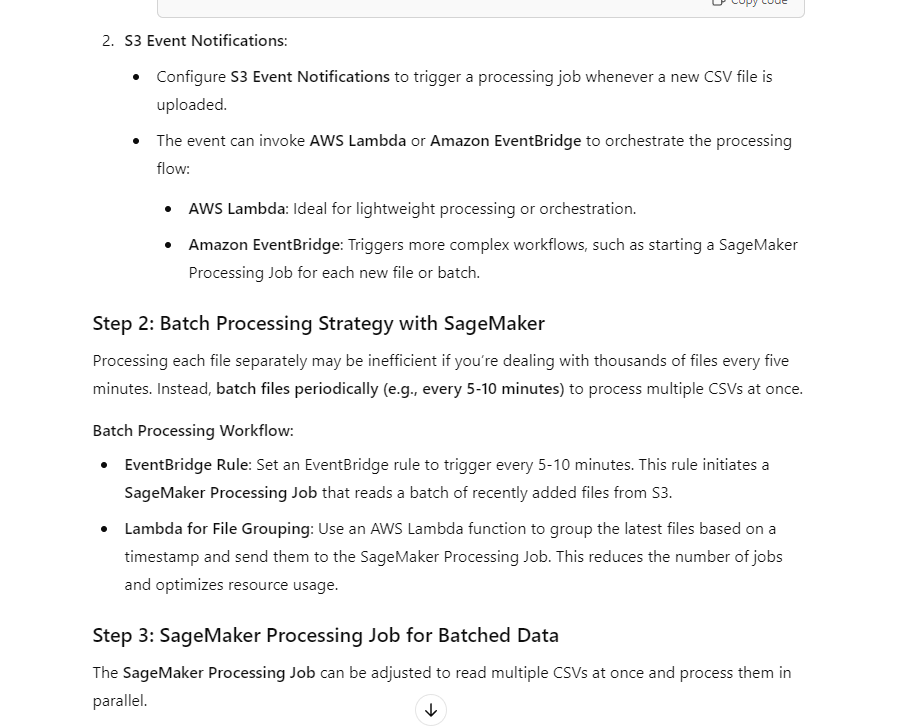

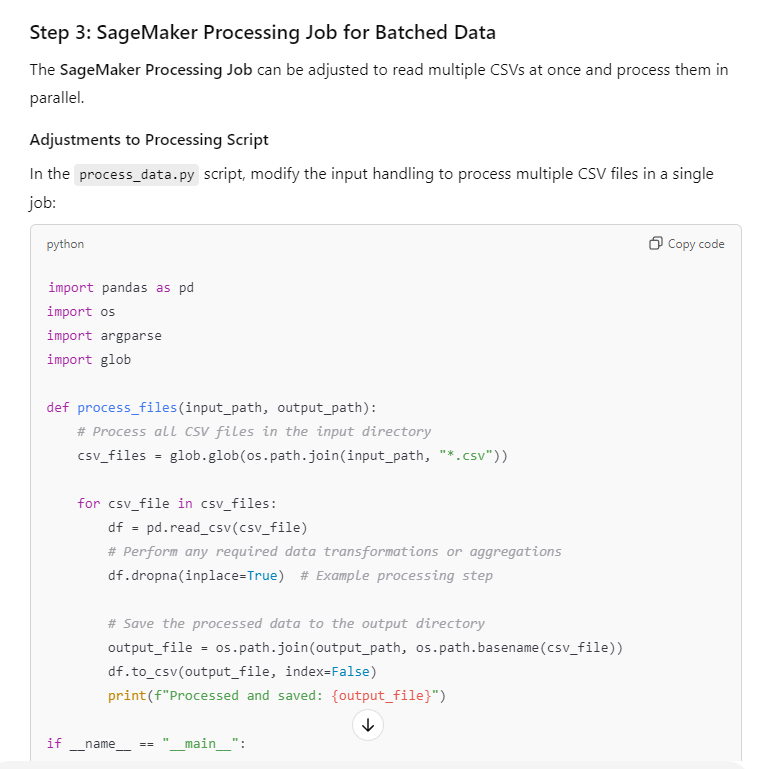

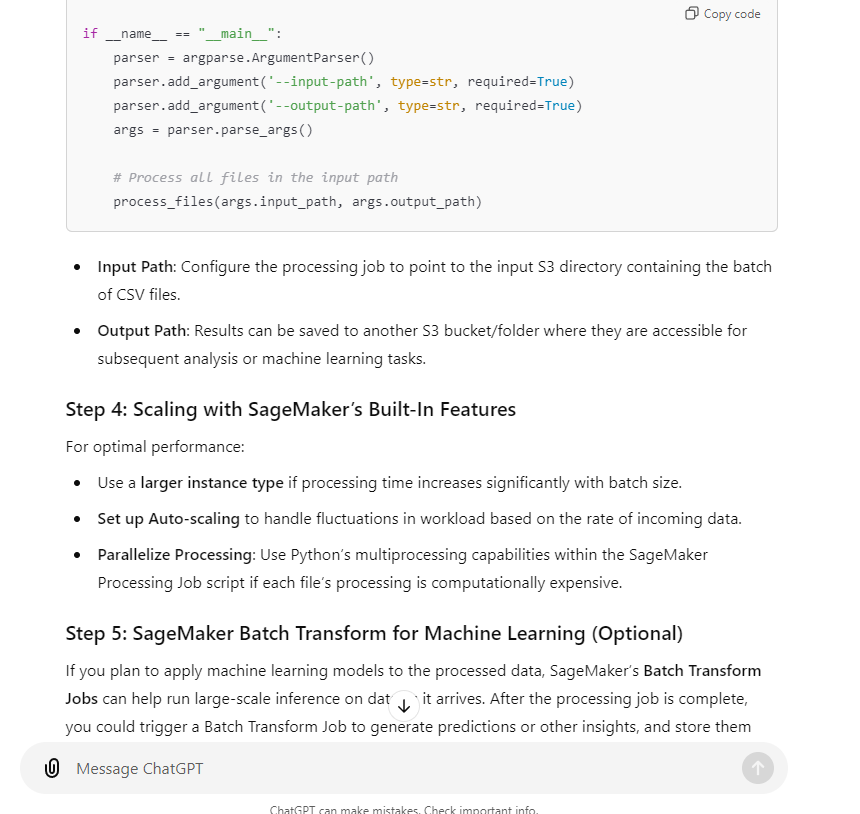

# how to run the sagemaker instance

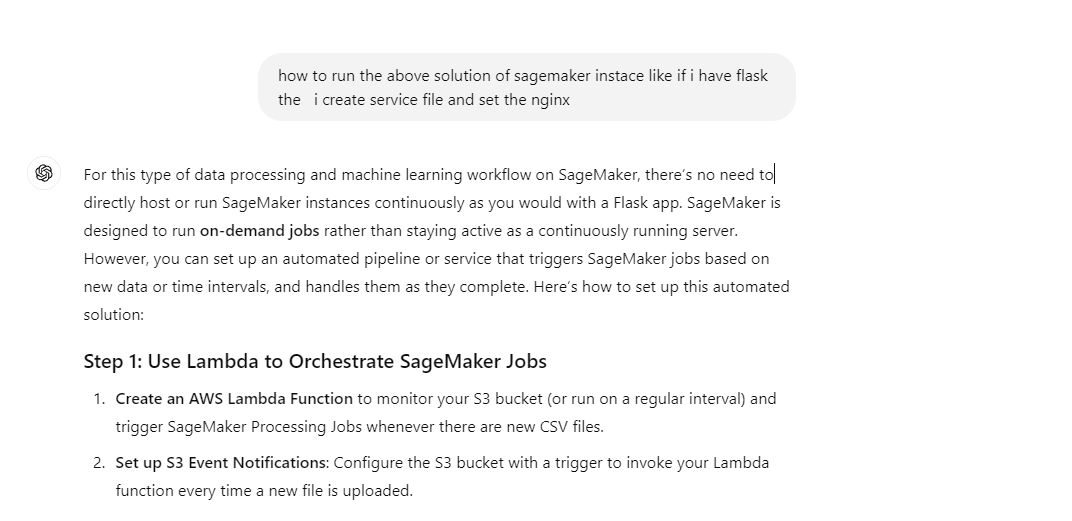

In [ ]:
import boto3
import os

def lambda_handler(event, context):
    sagemaker_client = boto3.client('sagemaker')
    s3_bucket = event['Records'][0]['s3']['bucket']['name']
    s3_key = event['Records'][0]['s3']['object']['key']
    
    # Define parameters for the Processing Job
    processing_job_name = 'cattle-data-processing-job'
    input_s3_uri = f's3://{s3_bucket}/{s3_key}'
    output_s3_uri = f's3://your-output-bucket/processed-data/'

    # Start the SageMaker Processing Job
    response = sagemaker_client.create_processing_job(
        ProcessingJobName=processing_job_name,
        ProcessingInputs=[
            {
                'InputName': 'input-1',
                'S3Input': {
                    'S3Uri': input_s3_uri,
                    'LocalPath': '/opt/ml/processing/input',
                    'S3DataType': 'S3Prefix',
                    'S3InputMode': 'File'
                }
            }
        ],
        ProcessingOutputConfig={
            'Outputs': [
                {
                    'OutputName': 'output-1',
                    'S3Output': {
                        'S3Uri': output_s3_uri,
                        'LocalPath': '/opt/ml/processing/output',
                        'S3UploadMode': 'EndOfJob'
                    }
                }
            ]
        },
        ProcessingResources={
            'ClusterConfig': {
                'InstanceCount': 1,
                'InstanceType': 'ml.m5.large',
                'VolumeSizeInGB': 30
            }
        },
        AppSpecification={
            'ImageUri': '382416733822.dkr.ecr.us-east-1.amazonaws.com/sagemaker-scikit-learn:0.23-1-cpu-py3',
            'ContainerArguments': [
                '--input-path', '/opt/ml/processing/input',
                '--output-path', '/opt/ml/processing/output'
            ],
            'ContainerEntrypoint': ['python3', '/opt/ml/processing/input/process_data.py']
        },
        RoleArn='arn:aws:iam::YOUR_ACCOUNT_ID:role/SageMakerRole',
        StoppingCondition={'MaxRuntimeInSeconds': 3600}
    )
    
    print("Started processing job:", response['ProcessingJobArn'])


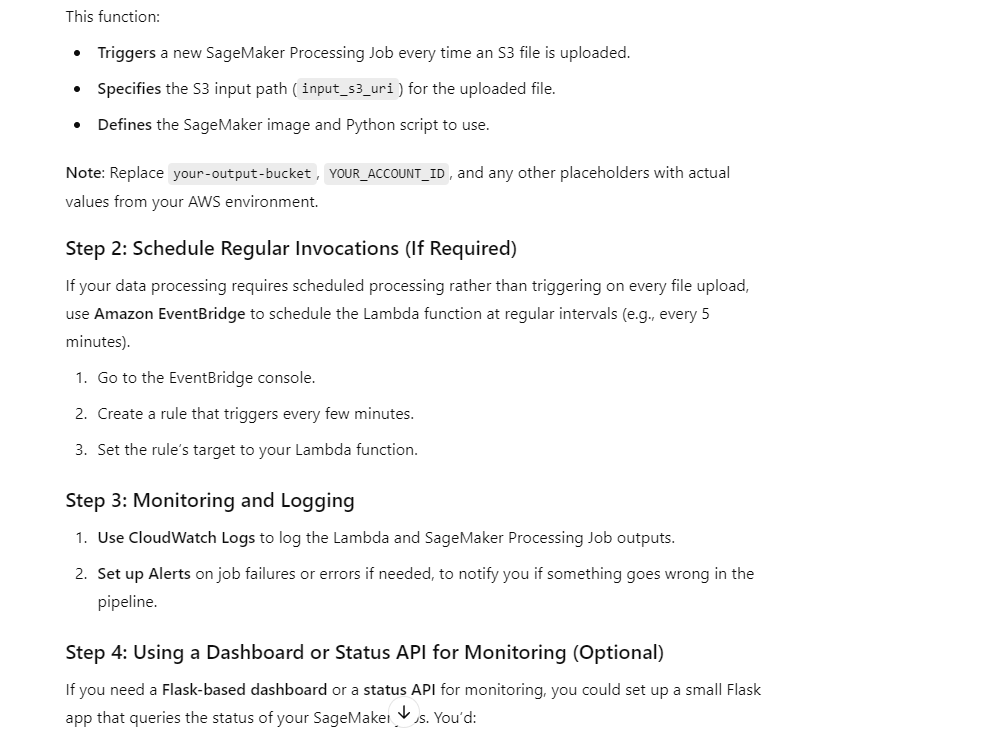

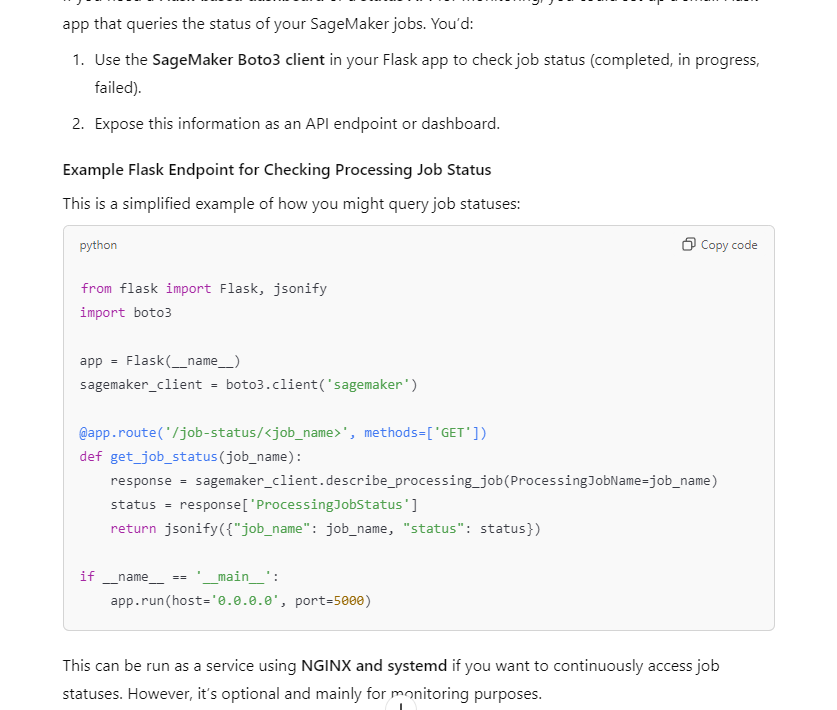